In [2]:
# Import data and take a look
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [14]:
#Mount google drive  
#from google.colab import drive
#drive.mount('/content/drive')

**Content**

**RowNumber—corresponds** to the record (row) number and has no effect on the output.

**CustomerId**—contains random values and has no effect on customer leaving the bank.

**Surname**—the surname of a customer has no impact on their decision to leave the bank.

**CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography**—a customer’s location can affect their decision to leave the bank.

**Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts**—refers to the number of products that a customer has purchased through the bank.

**HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember**—active customers are less likely to leave the bank.

**EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
  
**Exited**—whether or not the customer left the bank.


---



```
# Ce texte est au format code
```



In [4]:
#get spark dataframe from dataset csv file
#df = pd.read_csv("/content/drive/MyDrive/MSDE/ML_PROJECT/churn.csv")
df = pd.read_csv("churn.csv")

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#remove unnecessary column
df=df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [9]:
# check missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Descrive Numeric Data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
# Display target values
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

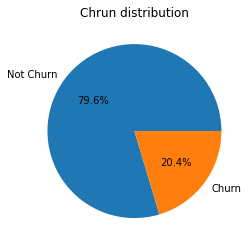

In [12]:

plt.pie(df["Exited"].value_counts(),labels=['Not Churn','Churn'], autopct='%1.1f%%')
plt.title('Chrun distribution')
plt.show()

In [13]:
pie_plot(df["Exited"].value_counts(), plot_title="<b>Client Churn Distribution<b>")

NameError: name 'pie_plot' is not defined

**DATA CLEANING** 

In [14]:
#Display unique values
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-------------')

CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

<AxesSubplot:xlabel='Geography', ylabel='count'>

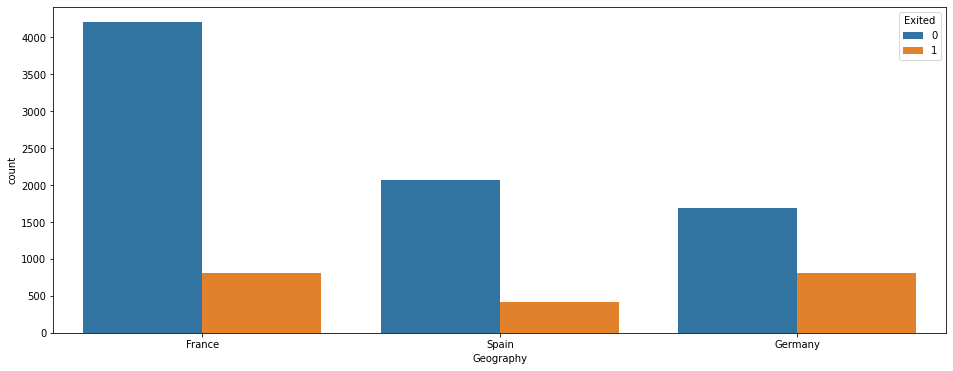

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(x='Geography',hue='Exited',data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

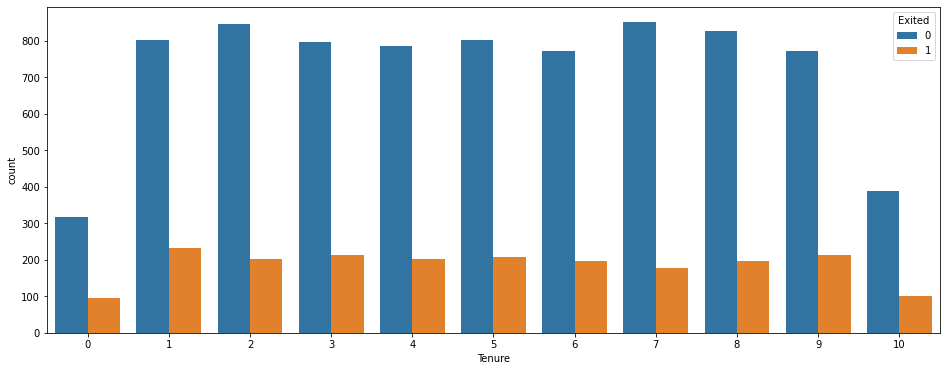

In [16]:
plt.figure(figsize=(16,6))
sns.countplot(x='Tenure',hue='Exited',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

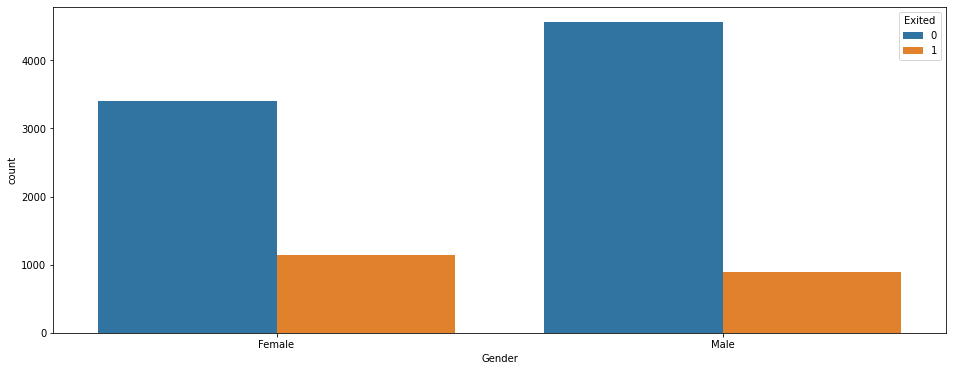

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x='Gender',hue='Exited',data=df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

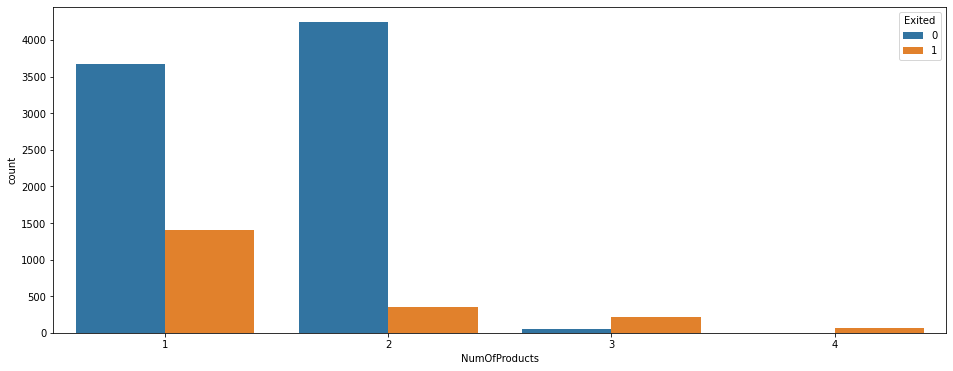

In [18]:
plt.figure(figsize=(16,6))
sns.countplot(x='NumOfProducts',hue='Exited',data=df)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

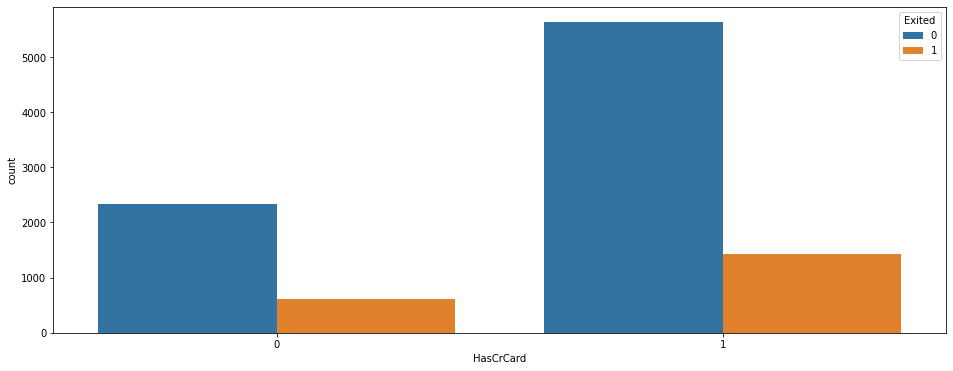

In [27]:
plt.figure(figsize=(16,6))
sns.countplot(x='HasCrCard',hue='Exited',data=df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

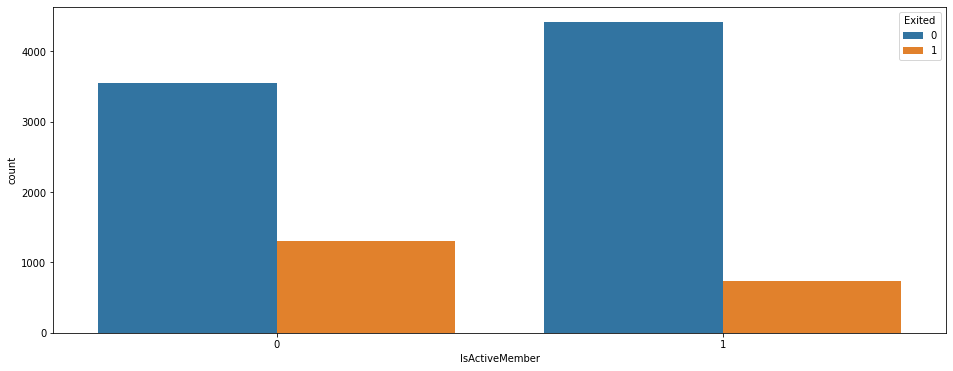

In [28]:
plt.figure(figsize=(16,6))
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

In [19]:
# Display Categorical feature
cat_features=[]
for col in df.columns:
    if df[col].dtypes == 'object':
        print("Number of categories of Feature '{0}' is : {1} ".format(col, len(df[col].unique())))
        cat_features.append(col)
print(cat_features)

Number of categories of Feature 'Geography' is : 3 
Number of categories of Feature 'Gender' is : 2 
['Geography', 'Gender']


In [20]:
# Encoding with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohencoder=OneHotEncoder(sparse=False, drop='if_binary')
ohe_transf=ohencoder.fit_transform(df[cat_features],)

ohe_df = pd.DataFrame(ohe_transf, columns=ohencoder.get_feature_names(cat_features))  
ohe_df
data = pd.concat([df, ohe_df], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,1.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,1.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,1.0


In [21]:
# Drop Initial Categorical feature after OneHot encoding
data.drop(cat_features,axis=1,inplace=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,1.0


In [22]:
data.shape

(10000, 13)

**Data Spliting (Train / Test Dataset)**

In [23]:
from sklearn.model_selection import train_test_split
X = data.drop('Exited',axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=21)

In [24]:
print("size of dataset : ", data.shape)
print(f"size of training dataset : {X_train.shape}")
print("size of test dataset : ", X_test.shape)

size of dataset :  (10000, 13)
size of training dataset : (7000, 12)
size of test dataset :  (3000, 12)


# Setting up Environment in PyCaret

In [25]:
#  5% of records (500) will been withheld from the original dataset to be used for predictions
data2 = data.sample(frac=0.95, random_state=786,  )
data_unseen = data.drop(data2.index)
data2.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data2.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 13)
Unseen Data For Predictions: (500, 13)


In [26]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
data2['Exited'].value_counts()

0    7583
1    1917
Name: Exited, dtype: int64

In [28]:
data_unseen['Exited'].value_counts()

0    380
1    120
Name: Exited, dtype: int64

In [29]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Exited', session_id=324) 

,Description,Value
0,session_id,324
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
best_model = compare_models(sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8594,0.8618,0.5040,0.7436,0.6002,0.5188,0.5336,0.0720
rf,Random Forest Classifier,0.8597,0.8545,0.4788,0.7647,0.5879,0.5089,0.5296,0.3640
gbc,Gradient Boosting Classifier,0.8590,0.8655,0.4720,0.7659,0.5834,0.5044,0.5261,0.3150
ada,Ada Boost Classifier,0.8514,0.8450,0.4734,0.7234,0.5716,0.4865,0.5029,0.1160
et,Extra Trees Classifier,0.8440,0.8344,0.4489,0.7006,0.5457,0.4572,0.4745,0.3760
dt,Decision Tree Classifier,0.7857,0.6882,0.5204,0.4908,0.5043,0.3680,0.3687,0.0260
lda,Linear Discriminant Analysis,0.8361,0.8331,0.3583,0.7178,0.4769,0.3929,0.4266,0.0240
ridge,Ridge Classifier,0.8318,0.0000,0.2725,0.7836,0.4032,0.3316,0.3950,0.0130
qda,Quadratic Discriminant Analysis,0.4643,0.5217,0.6206,0.2300,0.3129,0.0311,0.0468,0.0230
nb,Naive Bayes,0.7794,0.7531,0.1008,0.4017,0.1596,0.0827,0.1097,0.0180


In [31]:
clf2 = setup(data = data2, target = 'Exited' ,
                 fix_imbalance = True,
                 normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,)

,Description,Value
0,session_id,1918
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9500, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


# TOP 5 BEST MODEL

In [32]:
best_model2 = compare_models(n_select = 5,sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8442,0.8601,0.6135,0.6208,0.6167,0.5190,0.5193,0.5820
lightgbm,Light Gradient Boosting Machine,0.8507,0.8547,0.5525,0.6627,0.6017,0.5109,0.5146,0.1610
rf,Random Forest Classifier,0.8454,0.8453,0.5525,0.6424,0.5930,0.4985,0.5012,0.4930
ada,Ada Boost Classifier,0.8165,0.8419,0.6444,0.5438,0.5893,0.4724,0.4756,0.2250
lr,Logistic Regression,0.7625,0.8331,0.7435,0.4515,0.5616,0.4119,0.4362,0.0840
ridge,Ridge Classifier,0.7564,0.0000,0.7509,0.4441,0.5578,0.4047,0.4316,0.0390
lda,Linear Discriminant Analysis,0.7565,0.8323,0.7501,0.4442,0.5577,0.4047,0.4314,0.0560
svm,SVM - Linear Kernel,0.7555,0.0000,0.7450,0.4470,0.5567,0.4035,0.4299,0.0660
et,Extra Trees Classifier,0.8346,0.8285,0.4900,0.6215,0.5468,0.4476,0.4529,0.4630
knn,K Neighbors Classifier,0.7215,0.7592,0.6804,0.3955,0.5000,0.3253,0.3485,0.1770


In [33]:
print(best_model2)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1918, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=

# 1 - Gradient Boosting Classifier (GBC)

In [34]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8421,0.8501,0.5515,0.6303,0.5882,0.4911,0.4928
1,0.8346,0.8671,0.5956,0.5956,0.5956,0.4916,0.4916
2,0.8541,0.8686,0.6250,0.6489,0.6367,0.5455,0.5456
3,0.8271,0.8424,0.5515,0.5814,0.5660,0.4582,0.4584
4,0.8316,0.8250,0.5735,0.5909,0.5821,0.4767,0.4767
5,0.8571,0.8744,0.6618,0.6475,0.6545,0.5645,0.5646
6,0.8526,0.8592,0.6912,0.6267,0.6573,0.5638,0.5649
7,0.8586,0.8735,0.6471,0.6567,0.6519,0.5632,0.5632
8,0.8316,0.8741,0.6058,0.5887,0.5971,0.4907,0.4908
9,0.8524,0.8663,0.6324,0.6418,0.6370,0.5444,0.5444


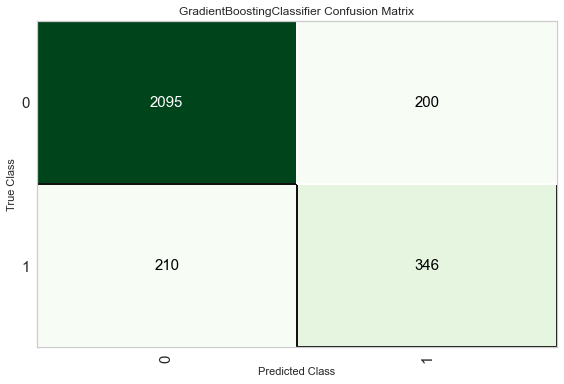

In [35]:
plot_model(gbc, plot = 'confusion_matrix')

In [36]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8240,0.5441,0.6916,0.6091,0.5232,0.5288
1,0.8556,0.8572,0.5956,0.6639,0.6279,0.5387,0.5399
2,0.8466,0.8476,0.5441,0.6491,0.5920,0.4985,0.5014
3,0.8286,0.8294,0.5074,0.5948,0.5476,0.4427,0.4448
4,0.8286,0.8127,0.5221,0.5917,0.5547,0.4491,0.4504
5,0.8526,0.8604,0.6029,0.6508,0.6260,0.5344,0.5350
6,0.8617,0.8476,0.6397,0.6692,0.6541,0.5677,0.5679
7,0.8451,0.8418,0.5147,0.6542,0.5761,0.4830,0.4882
8,0.8421,0.8467,0.5693,0.6290,0.5977,0.4998,0.5007
9,0.8479,0.8501,0.5735,0.6446,0.6070,0.5131,0.5144


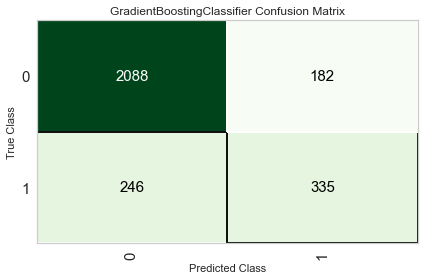

In [103]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

# 2 - LGBM Classifier (lgbm)

In [104]:
lightgbm2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8692,0.8688,0.6165,0.6949,0.6534,0.5731,0.5747
1,0.8466,0.8568,0.5564,0.6325,0.5920,0.4980,0.4996
2,0.8827,0.8637,0.6391,0.7391,0.6855,0.6139,0.6163
3,0.8617,0.8702,0.5597,0.6944,0.6198,0.5365,0.5411
4,0.8602,0.8866,0.5896,0.6752,0.6295,0.5438,0.5457
5,0.8541,0.8495,0.5000,0.6907,0.5801,0.4946,0.5040
6,0.8571,0.8799,0.6269,0.6512,0.6388,0.5498,0.5499
7,0.8301,0.8241,0.5000,0.5929,0.5425,0.4391,0.4415
8,0.8602,0.8443,0.5448,0.6952,0.6109,0.5272,0.5330
9,0.8554,0.8405,0.5263,0.6796,0.5932,0.5070,0.5132


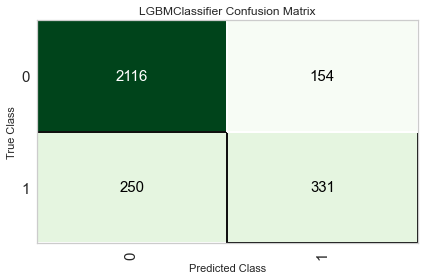

In [105]:
plot_model(lightgbm2, plot = 'confusion_matrix')

In [106]:
tuned_lightgbm2 = tune_model(lightgbm2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8556,0.8653,0.6241,0.6434,0.6336,0.5437,0.5438
1,0.8526,0.8520,0.5714,0.6496,0.6080,0.5177,0.5193
2,0.8782,0.8629,0.6165,0.7321,0.6694,0.5954,0.5987
3,0.8617,0.8726,0.5970,0.6780,0.6349,0.5500,0.5517
4,0.8586,0.8843,0.6269,0.6562,0.6412,0.5533,0.5535
5,0.8571,0.8432,0.5597,0.6757,0.6122,0.5256,0.5291
6,0.8466,0.8736,0.6194,0.6194,0.6194,0.5234,0.5234
7,0.8256,0.8284,0.4925,0.5789,0.5323,0.4259,0.4280
8,0.8481,0.8447,0.5299,0.6514,0.5844,0.4926,0.4966
9,0.8464,0.8385,0.4887,0.6566,0.5603,0.4697,0.4772


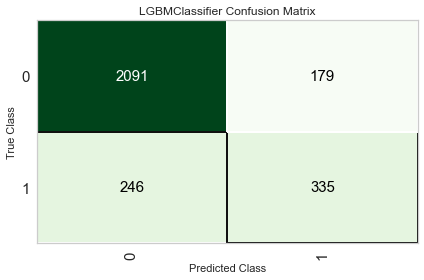

In [107]:
plot_model(tuned_lightgbm2, plot = 'confusion_matrix')

# 3- Random Forest (rf)

In [108]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8586,0.8745,0.6090,0.6585,0.6328,0.5455,0.5461
1,0.8451,0.8403,0.5639,0.6250,0.5929,0.4976,0.4986
2,0.8571,0.8608,0.5789,0.6638,0.6185,0.5311,0.5330
3,0.8632,0.8674,0.5970,0.6838,0.6375,0.5536,0.5555
4,0.8617,0.8738,0.5970,0.6780,0.6349,0.5500,0.5517
5,0.8406,0.8362,0.5224,0.6250,0.5691,0.4723,0.4751
6,0.8586,0.8709,0.6343,0.6538,0.6439,0.5558,0.5559
7,0.8241,0.8184,0.4776,0.5766,0.5224,0.4158,0.4185
8,0.8511,0.8467,0.5373,0.6606,0.5926,0.5027,0.5067
9,0.8494,0.8538,0.5263,0.6542,0.5833,0.4927,0.4971


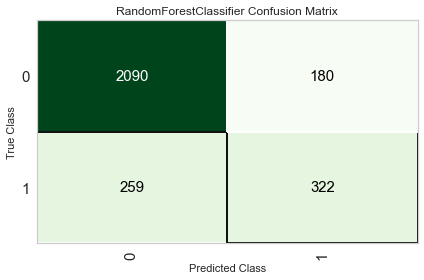

In [110]:
plot_model(rf, plot = 'confusion_matrix')

In [111]:
tuned_rf = tune_model(rf, )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8180,0.8690,0.7218,0.5333,0.6134,0.4979,0.5077
1,0.8195,0.8505,0.7068,0.5371,0.6104,0.4958,0.5037
2,0.8211,0.8557,0.6992,0.5407,0.6098,0.4962,0.5031
3,0.8226,0.8668,0.7388,0.5440,0.6266,0.5137,0.5241
4,0.8195,0.8666,0.7239,0.5389,0.6178,0.5030,0.5124
5,0.7985,0.8331,0.6493,0.5000,0.5649,0.4367,0.4430
6,0.8271,0.8753,0.7463,0.5525,0.6349,0.5249,0.5351
7,0.7955,0.8222,0.5896,0.4938,0.5374,0.4075,0.4101
8,0.8090,0.8340,0.6940,0.5196,0.5942,0.4727,0.4812
9,0.8133,0.8190,0.6316,0.5283,0.5753,0.4569,0.4599


In [121]:
#optimize = 'Recall'
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8180,0.8690,0.7218,0.5333,0.6134,0.4979,0.5077
1,0.8195,0.8505,0.7068,0.5371,0.6104,0.4958,0.5037
2,0.8211,0.8557,0.6992,0.5407,0.6098,0.4962,0.5031
3,0.8226,0.8668,0.7388,0.5440,0.6266,0.5137,0.5241
4,0.8195,0.8666,0.7239,0.5389,0.6178,0.5030,0.5124
5,0.7985,0.8331,0.6493,0.5000,0.5649,0.4367,0.4430
6,0.8271,0.8753,0.7463,0.5525,0.6349,0.5249,0.5351
7,0.7955,0.8222,0.5896,0.4938,0.5374,0.4075,0.4101
8,0.8090,0.8340,0.6940,0.5196,0.5942,0.4727,0.4812
9,0.8133,0.8190,0.6316,0.5283,0.5753,0.4569,0.4599


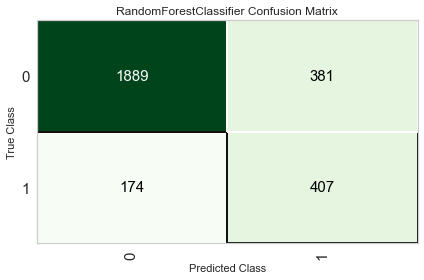

In [122]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# 4 - ADA Boost (ada)

In [123]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8195,0.8632,0.6541,0.5404,0.5918,0.4774,0.4809
1,0.8195,0.8389,0.6241,0.5425,0.5804,0.4662,0.4680
2,0.8271,0.8589,0.6541,0.5577,0.6021,0.4925,0.4951
3,0.8271,0.8679,0.6791,0.5583,0.6128,0.5028,0.5068
4,0.8301,0.8748,0.7388,0.5593,0.6367,0.5285,0.5372
5,0.8105,0.8310,0.6119,0.5256,0.5655,0.4453,0.4474
6,0.8376,0.8690,0.6642,0.5855,0.6224,0.5195,0.5211
7,0.8060,0.8257,0.5746,0.5168,0.5442,0.4214,0.4224
8,0.8316,0.8305,0.6269,0.5753,0.6000,0.4936,0.4943
9,0.8328,0.8212,0.6015,0.5797,0.5904,0.4854,0.4856


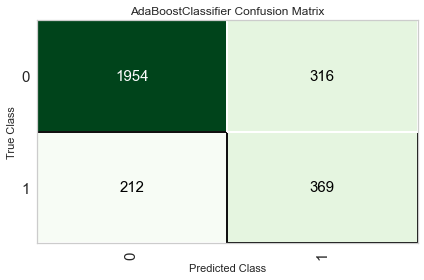

In [124]:
plot_model(ada, plot = 'confusion_matrix')

# 5- Logistic Regression (lr)

In [125]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7744,0.8554,0.7895,0.4626,0.5833,0.4428,0.4725
1,0.7594,0.8238,0.7218,0.4384,0.5455,0.3949,0.4176
2,0.7489,0.8313,0.7293,0.4254,0.5374,0.3810,0.4071
3,0.7609,0.8564,0.7761,0.4464,0.5668,0.4178,0.4483
4,0.7594,0.8524,0.7910,0.4454,0.5699,0.4205,0.4539
5,0.7459,0.7984,0.6716,0.4186,0.5158,0.3558,0.3741
6,0.7835,0.8630,0.7761,0.4771,0.5909,0.4548,0.4797
7,0.7474,0.8161,0.6940,0.4227,0.5254,0.3668,0.3878
8,0.7729,0.8193,0.7463,0.4608,0.5698,0.4270,0.4499
9,0.7877,0.8127,0.6917,0.4792,0.5662,0.4316,0.4444


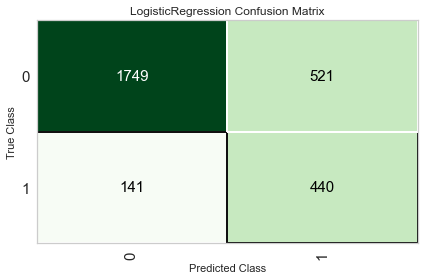

In [126]:
plot_model(lr, plot = 'confusion_matrix')

# Amélioration du modeèle Gbc

In [128]:
bagged_gbc = ensemble_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8451,0.8761,0.6316,0.6087,0.6199,0.5227,0.5228
1,0.8436,0.8622,0.6391,0.6028,0.6204,0.5221,0.5224
2,0.8617,0.8750,0.6541,0.6541,0.6541,0.5677,0.5677
3,0.8662,0.8814,0.6791,0.6642,0.6716,0.5876,0.5876
4,0.8556,0.8912,0.6791,0.6319,0.6547,0.5636,0.5642
5,0.8466,0.8418,0.5896,0.6270,0.6077,0.5125,0.5129
6,0.8541,0.8877,0.7015,0.6225,0.6596,0.5672,0.5689
7,0.8150,0.8377,0.5522,0.5401,0.5461,0.4300,0.4300
8,0.8406,0.8495,0.6119,0.6029,0.6074,0.5074,0.5074
9,0.8419,0.8402,0.5789,0.6111,0.5946,0.4965,0.4967


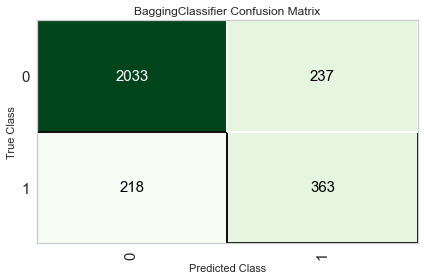

In [129]:
plot_model(bagged_gbc, plot = 'confusion_matrix')

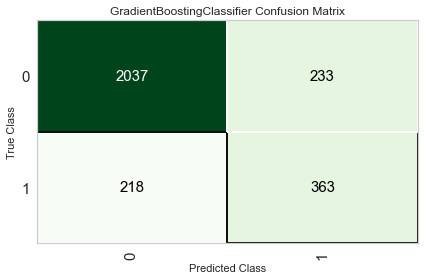

In [136]:
plot_model(gbc, plot = 'confusion_matrix')

In [130]:
boosted_gbc = ensemble_model(gbc, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8511,0.8560,0.5263,0.6604,0.5858,0.4964,0.5012
1,0.8586,0.8466,0.5639,0.6757,0.6148,0.5291,0.5323
2,0.8677,0.8505,0.5865,0.7027,0.6393,0.5591,0.5625
3,0.8632,0.8618,0.5821,0.6903,0.6316,0.5483,0.5513
4,0.8586,0.8777,0.5970,0.6667,0.6299,0.5429,0.5442
5,0.8481,0.8437,0.5224,0.6542,0.5809,0.4896,0.4942
6,0.8662,0.8684,0.5821,0.7027,0.6367,0.5556,0.5593
7,0.8331,0.8142,0.4403,0.6211,0.5153,0.4180,0.4270
8,0.8541,0.8326,0.5149,0.6832,0.5872,0.5008,0.5081
9,0.8494,0.8476,0.5263,0.6542,0.5833,0.4927,0.4971


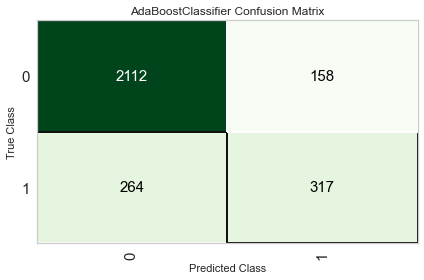

In [131]:
plot_model(boosted_gbc, plot = 'confusion_matrix')

In [132]:
bagged_gbc2 = ensemble_model(gbc, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8451,0.8777,0.6316,0.6087,0.6199,0.5227,0.5228
1,0.8406,0.8620,0.6316,0.5957,0.6131,0.5129,0.5132
2,0.8617,0.8762,0.6541,0.6541,0.6541,0.5677,0.5677
3,0.8677,0.8796,0.6791,0.6691,0.6741,0.5911,0.5911
4,0.8526,0.8926,0.6791,0.6233,0.6500,0.5569,0.5577
5,0.8436,0.8422,0.5896,0.6172,0.6031,0.5057,0.5059
6,0.8526,0.8874,0.6791,0.6233,0.6500,0.5569,0.5577
7,0.8105,0.8352,0.5373,0.5294,0.5333,0.4145,0.4145
8,0.8421,0.8508,0.6119,0.6074,0.6097,0.5107,0.5107
9,0.8419,0.8382,0.5789,0.6111,0.5946,0.4965,0.4967


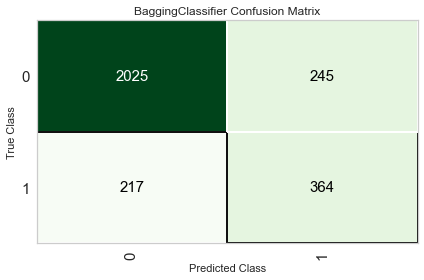

In [133]:
plot_model(bagged_gbc2, plot = 'confusion_matrix')

In [134]:
# blend individual models
blend_soft = blend_models(estimator_list = [gbc,lightgbm2, rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8602,0.8809,0.6165,0.6613,0.6381,0.5516,0.5521
1,0.8496,0.8607,0.5639,0.6410,0.6000,0.5079,0.5095
2,0.8707,0.8729,0.6015,0.7080,0.6504,0.5717,0.5746
3,0.8617,0.8781,0.6119,0.6721,0.6406,0.5552,0.5561
4,0.8571,0.8926,0.6194,0.6535,0.6360,0.5472,0.5475
5,0.8571,0.8491,0.5672,0.6726,0.6154,0.5284,0.5313
6,0.8571,0.8850,0.6567,0.6423,0.6494,0.5598,0.5598
7,0.8271,0.8360,0.5149,0.5798,0.5455,0.4391,0.4403
8,0.8602,0.8538,0.5746,0.6814,0.6235,0.5384,0.5413
9,0.8584,0.8501,0.5489,0.6822,0.6083,0.5232,0.5278


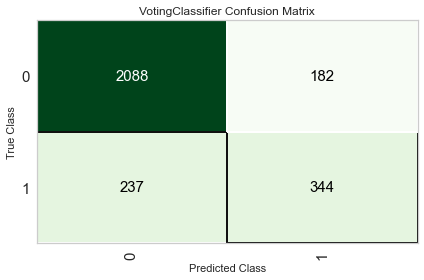

In [135]:
plot_model(blend_soft, plot = 'confusion_matrix')

In [57]:
clf2 = setup(data = data, target = 'Exited' ,
                
                 normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,4485
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [59]:
best_model3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8656,0.8625,0.4770,0.7724,0.5887,0.5138,0.5356,0.2000
rf,Random Forest Classifier,0.8633,0.8492,0.4671,0.7655,0.5794,0.5036,0.5259,0.2630
lightgbm,Light Gradient Boosting Machine,0.8620,0.8569,0.4967,0.7350,0.5921,0.5129,0.5275,0.0420
ada,Ada Boost Classifier,0.8533,0.8441,0.4621,0.7113,0.5596,0.4764,0.4927,0.0710
lr,Logistic Regression,0.8465,0.8335,0.3936,0.7206,0.5084,0.4268,0.4546,0.0310
et,Extra Trees Classifier,0.8453,0.8256,0.4332,0.6865,0.5306,0.4437,0.4608,0.2630
lda,Linear Discriminant Analysis,0.8445,0.8329,0.3476,0.7483,0.4743,0.3972,0.4377,0.0120
ridge,Ridge Classifier,0.8394,0.0000,0.2572,0.8317,0.3917,0.3282,0.4042,0.0060
svm,SVM - Linear Kernel,0.8337,0.0000,0.2875,0.7305,0.4034,0.3301,0.3816,0.0130
knn,K Neighbors Classifier,0.8258,0.7663,0.3674,0.6177,0.4599,0.3641,0.3820,0.0800


In [61]:
gbc3 =  create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8743,0.8706,0.5000,0.8068,0.6174,0.5471,0.5695
1,0.8771,0.8703,0.5141,0.8111,0.6293,0.5601,0.5810
2,0.8671,0.8725,0.4789,0.7816,0.5939,0.5199,0.5422
3,0.8471,0.8598,0.4577,0.6842,0.5485,0.4608,0.4743
4,0.8743,0.8789,0.5352,0.7755,0.6333,0.5605,0.5746
5,0.8686,0.8860,0.4539,0.8101,0.5818,0.5111,0.5413
6,0.8629,0.8563,0.4113,0.8169,0.5472,0.4765,0.5156
7,0.8557,0.8505,0.4397,0.7381,0.5511,0.4716,0.4941
8,0.8586,0.8297,0.4681,0.7333,0.5714,0.4916,0.5094
9,0.8698,0.8503,0.5106,0.7660,0.6128,0.5383,0.5542


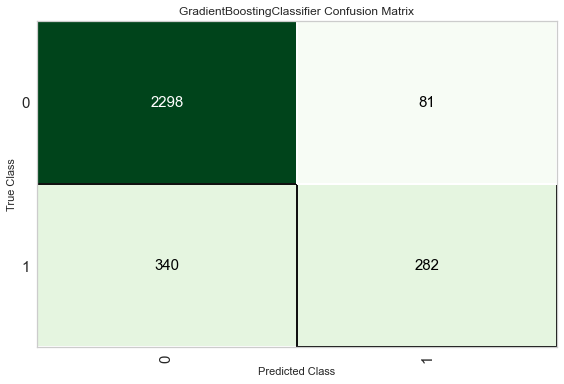

In [62]:
plot_model(gbc3, plot = 'confusion_matrix')

In [63]:
lightgbm3 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8629,0.8603,0.5141,0.7300,0.6033,0.5234,0.5352
1,0.8729,0.8744,0.5563,0.7524,0.6397,0.5646,0.5741
2,0.8657,0.8775,0.5211,0.7400,0.6116,0.5333,0.5453
3,0.8400,0.8365,0.4648,0.6471,0.5410,0.4472,0.4562
4,0.8843,0.8803,0.5563,0.8144,0.6611,0.5943,0.6100
5,0.8600,0.8790,0.4681,0.7416,0.5739,0.4952,0.5140
6,0.8571,0.8420,0.4326,0.7531,0.5495,0.4719,0.4976
7,0.8457,0.8471,0.4468,0.6774,0.5385,0.4505,0.4645
8,0.8600,0.8230,0.4752,0.7363,0.5776,0.4983,0.5155
9,0.8712,0.8492,0.5319,0.7576,0.6250,0.5501,0.5627


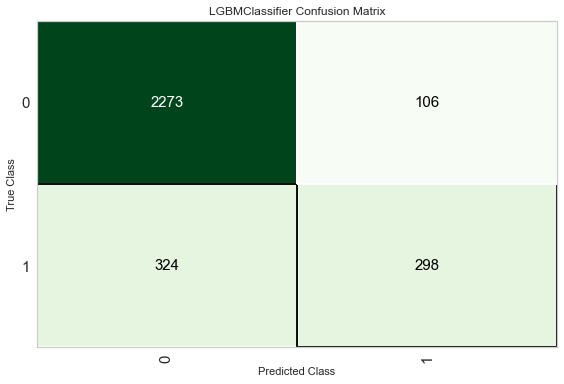

In [64]:
plot_model(lightgbm3, plot = 'confusion_matrix')

# Save Model

In [37]:
# save transformation pipeline and model 
save_model(gbc, model_name = 'bellout_ml1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [38]:
pip install streamlit

  Using cached streamlit-1.2.0-py2.py3-none-any.whl (9.1 MB)
  Using cached base58-2.1.1-py3-none-any.whl (5.6 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pydeck-0.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached Pympler-0.9.tar.gz (178 kB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached tzlocal-4.1-py3-none-any.whl (19 kB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\envs\\pcr\\lib\\site-packages\\click-8.0.3.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.




  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2021.5-py2.py3-none-any.whl (339 kB)
  Created wheel for pympler: filename=Pympler-0.9-py3-none-any.whl size=164824 sha256=a48ceec060f2bab6b75ad19b5fdb826c3d46c1d6c6b244c88bf99e0f981078fb
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\1a\f3\d8\35d5614ea4ddd295ffb9372a5f2f9570d9593d1ea4be33ec6d
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=4ea8b305158bb2c17270eb7de8e89495a171f123f49ff4ebea3cb0cb6603c365
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\22\f5\18\df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built pympler blinker
  Attempting uninstall: click
    Found existing installation: click 8.0.3
    Uninstalling click-8.0.3:


# Nouvelle section